# Linear Regression

## 1. Linear regression with one variable

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. 

### 1.1 Visualizing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# Update the matplotlib configuration parameters:
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [3]:
def plotData(x, y):
    """ Plots the data points x and y into a new figure;
        plotData(x, y) plots the data points and gives the figure axes labels of population and profit.
    """
    fig, ax = plt.subplots(figsize=(9,6))
    
    ax.plot(x, y, 'rx', markersize=8)
    ax.set_xlabel('Profit in $10,000s')
    ax.set_ylabel('Population of City in 10,000s')
    ax.set_title('Profits vs Populations')
    
    return fig, ax

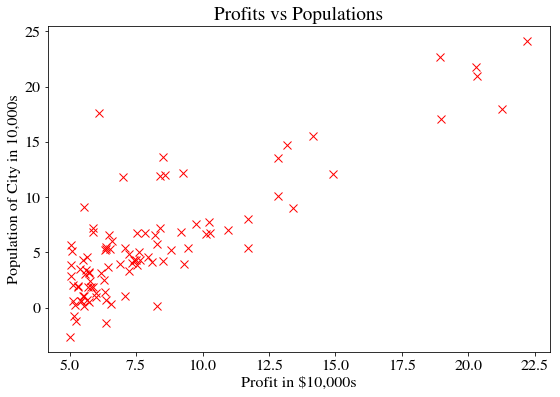

In [4]:
# load comma separated txt file
data = np.loadtxt('ex1data1.txt', delimiter=',')   # data is 97 by 2
X = data[:, 0][:, np.newaxis]   # X is 97 by 1
y = data[:, 1][:, np.newaxis]   # y is 97 by 1
fig, ax = plotData(X, y)

### 1.2 Gradient Descent
In this part, we will fit the linear regression parameters $\mathbf \theta$ to our dataset
using gradient descent.

The objective of linear regression is to minimize the cost function
$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$h_\theta(x)=\theta^T x=\theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
$$\theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the
optimal values that will achieve the lowest cost $J(\theta)$.

In [5]:
def computeCost(X, y, theta):
    """ computeCost(X, y, theta) computes the cost of using theta as the
   parameter for linear regression to fit the data points in X and y
    """
    
    m = len(y)
    J = 0.5 / m * np.sum((np.dot(X, theta)-y)**2)
    
    return J

In [6]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """ gradientDescent(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    m = len(y)
    J_history = np.zeros((num_iters, 1))
    # print(J_history.shape)
    
    for i in range(num_iters):
        
        # update theta
        theta = theta - alpha / m * np.dot(X.T, (np.dot(X, theta)-y))
        J_history[i, 0] = computeCost(X, y, theta)
        
    return theta, J_history

In [7]:
m = len(y)
# X with bias items
X_wb = np.append(np.ones((m, 1)), X, axis=1)
theta0 = np.zeros((2, 1))

# gradient descent settings
iterations = 1500
alpha = 0.01

# test cost function
J = computeCost(X_wb, y, theta0)
print('Expected 32.07 here.')
print('Actual result is {:.2f}.'.format(J))

J = computeCost(X_wb, y, np.array([[-1], [2]]))
print('Expected 54.24 here.')
print('Actual result is {:.2f}.'.format(J))


# run gradient descent
theta, J_hist = gradientDescent(X_wb, y, theta0, alpha, iterations)

# test theta
print('Expected \n-3.6303 \n1.1664\n')
print('Actual result is \n{:.4f} \n{:.4f}'.format(theta[0, 0], theta[1, 0]))

Expected 32.07 here.
Actual result is 32.07.
Expected 54.24 here.
Actual result is 54.24.
Expected 
-3.6303 
1.1664

Actual result is 
-3.6303 
1.1664


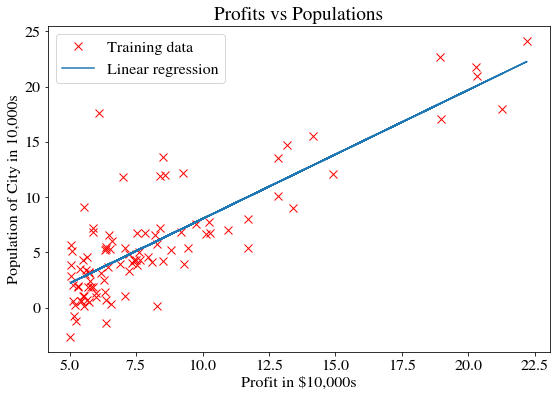

In [8]:
# Plot the result
fig, ax = plotData(X, y)
ax.plot(X, np.dot(X_wb, theta))
ax.legend(['Training data', 'Linear regression'])

In [9]:
# Predict profit
predict1 = np.dot(np.array([1, 3.5]), theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1[0]*10000))

predict2 = np.dot(np.array([1, 7]), theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2[0]*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



### 1.3 Visualizing $J(\theta)$

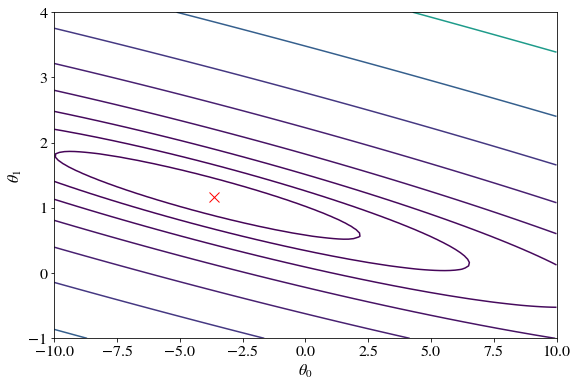

In [10]:
# Create theta grid
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))


# Fill out J_vals
for i, theta0i in enumerate(theta0_vals):
    for j, theta1j in enumerate(theta1_vals):
        t = np.array([[theta0i], [theta1j]])
        J_vals[i, j] = computeCost(X_wb, y, t)
        
# Contour plot
fig, ax = plt.subplots(figsize=(9,6))

# note, J needs to be transposed
# ax.contour(X, Y, Z, levels), np.logspace(start, stop, num)
ax.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20))
ax.plot(theta[0], theta[1], 'rx', markersize=10)

# Mathtext should be placed between a pair of dollar signs ($)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

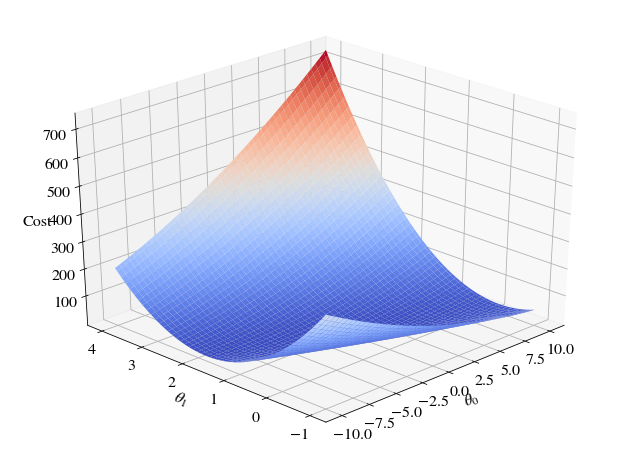

In [11]:
# Surface plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')


Xt, Yt = np.meshgrid(theta0_vals, theta1_vals)
surf = ax.plot_surface(Xt, Yt, J_vals.T, cmap=cm.coolwarm)
ax.view_init(30, -135)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'Cost')

# 2. Linear regression with multiple variables
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

### 2.1 Feature Normalization


In [12]:
def featureNormalize(X):
    """returns a normalized version of X where
       the mean value of each feature is 0 and the standard deviation
       is 1. This is often a good preprocessing step to do when
       working with learning algorithms.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma
    

In [13]:
# load comma separated txt file
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2][:, np.newaxis]
m = len(y)

# print out some sample data
print("First 10 samples from the dataset: ")
for i in range(10):
    print('x = [{:.0f} {:.0f}], y = {:.0f}'.format(X[i, 0], X[i, 1], y[i, 0]))
    
# Scale features
print('Normalizing Features...')
X, mu, sigma = featureNormalize(X)
print(X.shape, mu.shape, sigma.shape)

# add bias term to X
X_wb = np.append(np.ones((m, 1)), X, axis=1)
print(X_wb.shape)

First 10 samples from the dataset: 
x = [2104 3], y = 399900
x = [1600 3], y = 329900
x = [2400 3], y = 369000
x = [1416 2], y = 232000
x = [3000 4], y = 539900
x = [1985 4], y = 299900
x = [1534 3], y = 314900
x = [1427 3], y = 198999
x = [1380 3], y = 212000
x = [1494 3], y = 242500
Normalizing Features...
((47, 2), (2,), (2,))
(47, 3)


### 2.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update rule remain unchanged.

Note: my code in the previous part (single variable) already supports multiple variables, so I will reuse the function here

In [14]:
# parameters
alpha = 1.0
num_iters = 100

# init
theta0 = np.zeros((3, 1))

# run gradient descent
theta, J_history = gradientDescent(X_wb, y, theta0, alpha, num_iters)

# Display result
print('Theta computed from gradient descent: ')
print('{}'.format(theta))

Theta computed from gradient descent: 
[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]


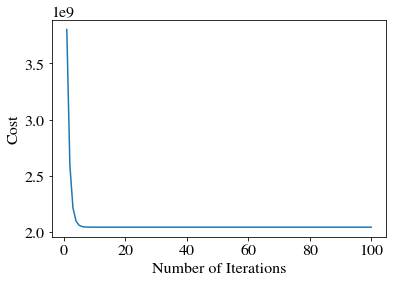

In [15]:
# Plot learning curve
plt.figure()
plt.plot(np.arange(1, len(J_history)+1), J_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')

In [16]:
# Estimate the price of a 1650 sq-ft, 3 br house
X_norm = (np.array([[1650, 3]]) - mu) / sigma
price = np.dot(np.append(np.ones((1, 1)), X_norm, axis=1), theta)
print('The estimated price for a 1650 sq-ft, 3 br house is {:.2f}.'.format(price[0, 0]))

The estimated price for a 1650 sq-ft, 3 br house is 293081.46.


#### 2.2.1 Learning rate
Try different learning rates and see how it affect learnning curve. 

(-1, 70000000000.0)

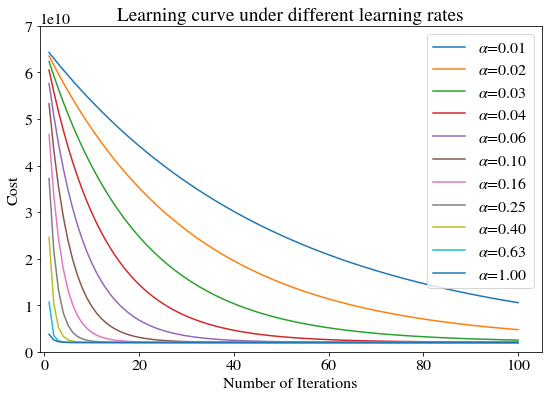

In [17]:
# parameters
num_iters = 100
alphas = np.logspace(-2, 0, 11)

# init
theta0 = np.zeros((3, 1))
fig, ax = plt.subplots(figsize=(9,6))

for alpha in alphas:
    # run gradient descent
    theta, J_history = gradientDescent(X_wb, y, theta0, alpha, num_iters)

    # Plot learning curve
    ax.plot(np.arange(1, len(J_history)+1), J_history)
    
    
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Cost')
ax.set_title('Learning curve under different learning rates')
#plt.legend(['1', '2', '3', '4', '5', '6'])
ax.legend(list(map(lambda x: r'$\alpha$={:.2f}'.format(x), alphas)))

ax.set_xlim([-1, 105])
ax.set_ylim([-1, 7e10])

### 2.3 Normal Equations
A closed-form solution to linear regression is:
$$\theta = (X^T X)^{-1}X^Ty$$
Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no loop until convergence like in gradient descent.

In [18]:
def normalEqn(X, y):
    """normalEqn(X, y) computes the closed-form solution to linear 
       regression using the normal equations.
    """
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    
    return theta

In [19]:
# Calculate theta using normal eqn
theta = normalEqn(X_wb, y)

# Display result
print('Theta computed from the normal equations: ')
print('{}'.format(theta))

# Estimate the price of a 1650 sq-ft, 3 br house
X_norm = (np.array([[1650, 3]]) - mu) / sigma
price = np.dot(np.append(np.ones((1, 1)), X_norm, axis=1), theta)
print('The estimated price for a 1650 sq-ft, 3 br house is {:.2f}.'.format(price[0, 0]))

Theta computed from the normal equations: 
[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]
The estimated price for a 1650 sq-ft, 3 br house is 293081.46.
